In [1]:
import sys
import math
from scipy import ndimage
from scipy import misc
import time
import six
import os
import argparse
import time
#import cPickle as cpickle
#import net
import pickle
import gzip
import copy
import matplotlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import chainer

from numpy import genfromtxt
#from fastdtw import fastdtw
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC
from sklearn import linear_model as lin
import scipy.spatial.distance as dis
import chainer.functions as F
import chainer.links as L
import chainer.optimizers as O
from chainer import cuda, Function, gradient_check, Variable, optimizers, serializers, utils, computational_graph
from chainer import Link, Chain, ChainList

#New import?


%matplotlib inline  

In [4]:
class RNN(Chain):
    def __init__(self):
        super(RNN, self).__init__(
            #embed=L.EmbedID(1000, 100),  # word embedding
            mid=L.LSTM(14, 5),  # the first LSTM layer
            out=L.Linear(5, 3),  # the feed-forward output layer
        )

    def reset_state(self):
        self.mid.reset_state()

    def __call__(self, x): # x = cur_word
        # Given the current word ID, predict the next word.
        #x = self.embed(cur_word)
        h = self.mid(x)
        y = self.out(h)
        return y

rnn = RNN()
model = L.Classifier(rnn)
optimizer = optimizers.SGD()
optimizer.setup(model)

In [12]:
x = np.random.random(1000).astype(np.float32)+ np.arange(1,101,0.1).astype(np.float32)
x_feat = np.zeros((x.size,14)).astype(np.float32)
x_t = np.zeros(x.size).astype(np.int32)

"""
#pred not defined error lentebb??
for i in range(14,x.size-1,1):
    x_t[i]=int(float((x[i]-x[i-1])/2)*14) # woodoo
    x_feat[i,:] = x[i-14:i]
pred = np.zeros((x.size,14))
"""

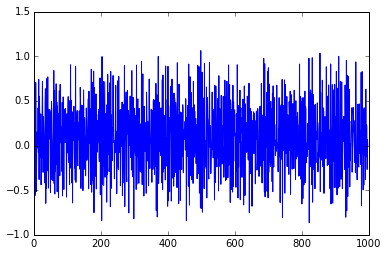

In [6]:
plt.plot(x[1:]-x[:-1])

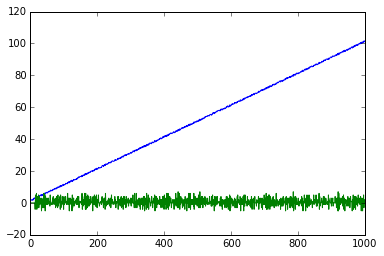

In [13]:
plt.plot(x)
plt.plot(x_t)

In [14]:
for i in range(3,x.size-1,1):
    act = Variable(x_feat[i:i+1])
    t = Variable(x_t[i:i+1])
    pred_act = model.predictor(act)
    pred[i] = pred_act.data
    optimizer.update(model,act,t)

ValueError: could not broadcast input array from shape (3) into shape (14)

In [10]:
pred_act.data

array([[ 0.,  0.,  0.]], dtype=float32)

In [11]:
plt.figure(figsize=(20,10),dpi=300)


plt.plot(np.argmax(pred,axis=1),color='orange')
plt.plot(x_t[:],color='red')

NameError: name 'pred' is not defined

In [15]:
# Adatok beolvasása
BTC_ETHDataFrame = pd.read_csv('C:\BME GAIN\Diploma 1\Adatok\BlockChainData\BTC_ETH.csv')
USD_ETHDataFrame = pd.read_csv('C:\BME GAIN\Diploma 1\Adatok\BlockChainData\USD_ETHER.csv')
USD_BTCDataFrame = pd.read_csv('C:\BME GAIN\Diploma 1\Adatok\BlockChainData\USDT_BTC.csv')

In [16]:
USD_ETHDataFrame.shape

(2798, 8)

In [30]:
USD_ETHDataFrame.head()

,close,date,high,low,open,quoteVolume,volume,weightedAverage
0,1.85,2015-08-08 04:00:00,1.85,0.5,1.65,84.016385,144.428193,1.719048
1,1.40,2015-08-08 08:00:00,1.70,1.4,1.70,92.523053,129.575776,1.400470
2,1.40,2015-08-08 12:00:00,1.40,1.4,1.40,0.000000,0.000000,1.400000
3,1.40,2015-08-08 16:00:00,1.40,1.4,1.40,0.000000,0.000000,1.400000
4,1.40,2015-08-08 20:00:00,1.40,1.4,1.40,0.000000,0.000000,1.400000


In [26]:
import datetime as dt

dt.datetime.strptime(BTC_ETHDataFrame['date'].values,'%Y-%m-%d %H:%M:%S')

TypeError: must be string, not numpy.ndarray

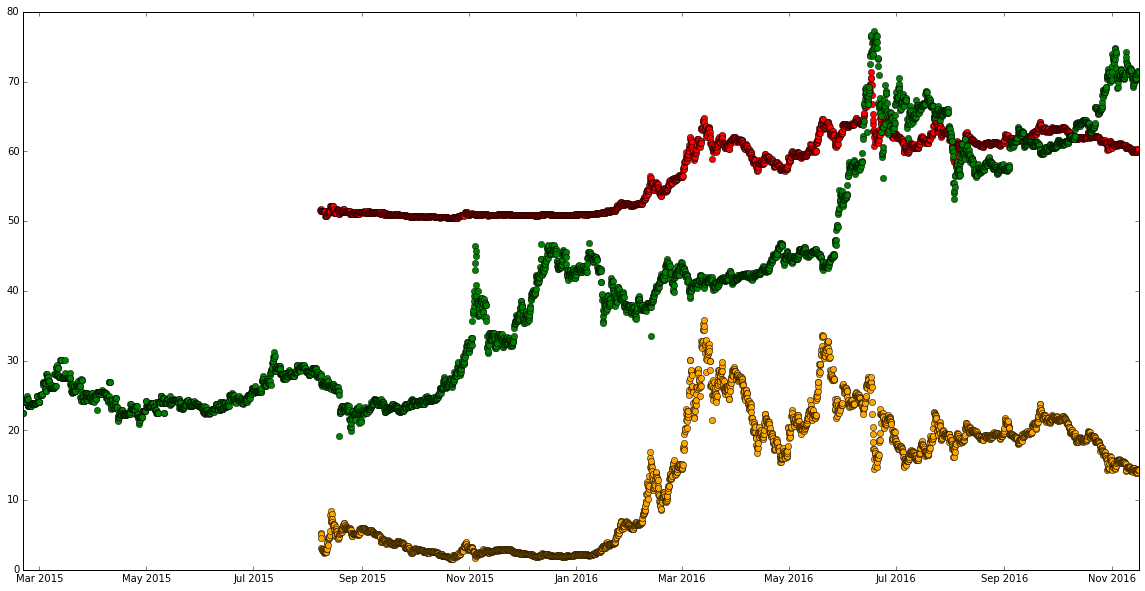

In [17]:
plt.figure(figsize=(20,10),dpi=300)

plt.plot_date(pd.to_datetime(USD_ETHDataFrame['date']),USD_ETHDataFrame['open'].values+50,color='red')
plt.plot_date(pd.to_datetime(USD_BTCDataFrame['date']),USD_BTCDataFrame['open'].values/10,color='green')
plt.plot_date(pd.to_datetime(BTC_ETHDataFrame['date'][1:]),1000*BTC_ETHDataFrame['open'].values[1:],color='orange')
plt.show()

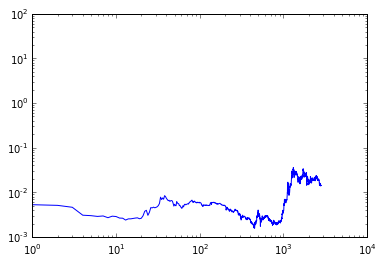

In [37]:
plt.plot(BTC_ETHDataFrame['open'].values)
plt.loglog()
plt.show()

In [43]:
BTC_ETHDataFrame

,close,date,high,low,open,quoteVolume,volume,weightedAverage
0,0.004555,2015-08-08 04:00:00,50.000000,0.004500,50.000000,54434.780924,329.649378,0.006056
1,0.005350,2015-08-08 08:00:00,0.005488,0.004225,0.005278,62325.494919,304.983198,0.004893
2,0.004621,2015-08-08 12:00:00,0.005840,0.004324,0.005101,30462.689907,145.251297,0.004768
3,0.003070,2015-08-08 16:00:00,0.004770,0.002620,0.004621,74319.505974,272.400189,0.003665
4,0.003125,2015-08-08 20:00:00,0.003870,0.002900,0.003070,44663.608672,153.519259,0.003437
5,0.002940,2015-08-09 00:00:00,0.003350,0.002400,0.003000,47119.904955,126.870697,0.002693
6,0.003149,2015-08-09 04:00:00,0.004100,0.002610,0.002884,47505.032130,152.332268,0.003207
7,0.002680,2015-08-09 08:00:00,0.003230,0.002680,0.002953,46590.240014,135.203544,0.002902
8,0.002920,2015-08-09 12:00:00,0.002966,0.002626,0.002700,23742.411875,64.143947,0.002702
9,0.002810,2015-08-09 16:00:00,0.003164,0.002580,0.002920,79685.569524,224.998405,0.002824


In [18]:
BTC_ETHDataFrameNN = BTC_ETHDataFrame[-2000:]
USD_ETHDataFrameNN = USD_ETHDataFrame[-2000:]
USD_BTCDataFrameNN = USD_BTCDataFrame[-2000:]
#BTC_ETHDataFrameNN.shape

In [19]:
del BTC_ETHDataFrameNN['date']
del USD_ETHDataFrameNN['date']
del USD_BTCDataFrameNN['date']

In [62]:
BTC_ETHDataFrameNN

,close,high,low,open,quoteVolume,volume,weightedAverage
799,0.001920,0.001970,0.001889,0.001940,41960.216217,80.675683,0.001923
800,0.001947,0.001960,0.001903,0.001920,23949.466144,46.366481,0.001936
801,0.001970,0.001990,0.001931,0.001947,13978.115195,27.506388,0.001968
802,0.001951,0.001991,0.001949,0.001973,12634.753000,24.879044,0.001969
803,0.002002,0.002029,0.001951,0.001951,18432.939278,36.771535,0.001995
804,0.001974,0.002002,0.001960,0.002002,11852.645213,23.517703,0.001984
805,0.001971,0.002000,0.001960,0.001975,12778.675409,25.379902,0.001986
806,0.002002,0.002028,0.001971,0.001975,24175.099434,48.458927,0.002004
807,0.002050,0.002185,0.002000,0.002002,146543.468862,307.294409,0.002097
808,0.002040,0.002065,0.002020,0.002050,17661.455192,36.149520,0.002047


In [20]:
feat = np.zeros((2000,14)).astype(np.float32)
target = np.array(BTC_ETHDataFrameNN.values).astype(np.float32)
feat[:,:7] = np.array(USD_BTCDataFrameNN.values).astype(np.float32)
feat[:,7:] = np.array(USD_ETHDataFrameNN.values).astype(np.float32)

label=np.zeros(2000).astype(np.int32)
n=12
for i in range(n,1999,1):
    label[i]=0
    if np.mean(target[i-n:i,0])<target[i,0]:
        label[i]=1

In [21]:
class RNN(Chain):
    def __init__(self):
        super(RNN, self).__init__(
            #embed=L.EmbedID(1000, 100),  # word embedding
            mid=L.LSTM(14, 5),  # the first LSTM layer
            out=L.Linear(5, 2),  # the feed-forward output layer
        )

    def reset_state(self):
        self.mid.reset_state()

    def __call__(self, x): # x = cur_word
        # Given the current word ID, predict the next word.
        #x = self.embed(cur_word)
        h = self.mid(x)
        y = self.out(h)
        return y

rnn = RNN()
model = L.Classifier(rnn)
optimizer = optimizers.SGD()
optimizer.setup(model)

In [22]:
pred=np.zeros((2000,2)).astype(np.float32)

for i in range(label.size):
    act = Variable(feat[i:i+1])
    t = Variable(label[i:i+1])
    pred_act = model.predictor(act)
    pred[i] = pred_act.data
    optimizer.update(model,act,t)
    print i

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

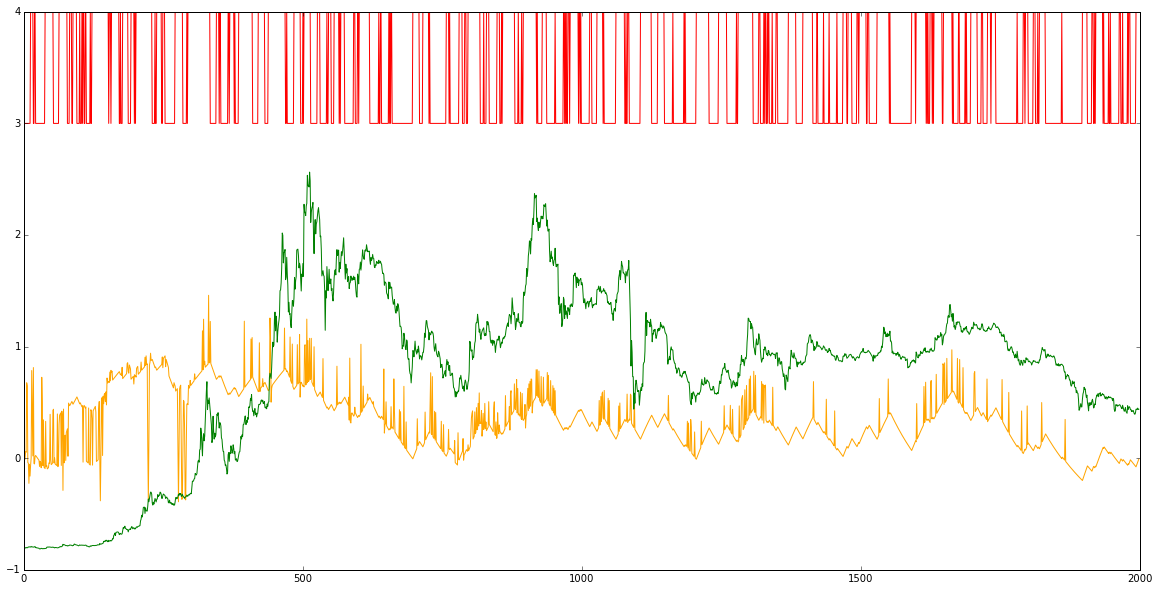

In [25]:
plt.figure(figsize=(20,10),dpi=300)
plt.plot(pred[:1999,1],color='orange')
plt.plot(label[:1999]+3,color='red')
plt.plot(target[:1999,0]*100-1,color='green')
plt.show()

In [27]:
roc_auc_score(label[1700:1999],pred[1700:1999,1])

0.52961816305469556

In [29]:
#BTC_ETHDataFrameNN
#USD_ETHDataFrameNN
#USD_BTCDataFrameNN

def KNNDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2) #túl nagy a négyzet? -> ne egész DataFramet nézze?
    return np.sqrt(distance)


In [31]:
distance = KNNDistance(USD_ETHDataFrameNN[['close']], USD_BTCDataFrameNN[['close']], 1999) # 1999 a length?
print 'Distance: ' + repr(distance)

KeyError: 0